# Twitter sentiment Extaction-Analysis, EDA and Model
[Kaggle | Twitter sentiment Extaction-Analysis,EDA and Model](https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model)    
[Kaggle | NER-inference using spacy (LB: 0.628)](https://www.kaggle.com/code/rohitsingh9990/ner-inference-using-spacy-lb-0-628)    
<br>
### [Dataset](https://www.kaggle.com/competitions/tweet-sentiment-extraction)   
```
매 초마다 올라오는 많은 트윗 속에서 특정 트윗 뒤에 있는 정서가 
기업이나 개인의 브랜드에 영향을 미치거나(긍정적인) 부정적인 영향을 미치기 때문에 이익을 파괴할지 ​​여부를 말하기 어렵습니다. 
결정과 반응이 몇 초 만에 생성되고 업데이트되는 이 시대에는 언어로 감정을 포착하는 것이 중요합니다. 
그러나 실제로 감정 설명으로 이어지는 단어는 무엇입니까? 
이 대회에서는 트윗에서 감정을 반영하는 부분(단어 또는 구문)을 선택해야 합니다.

이 광범위한 트윗 데이터 세트를 사용하여 이 중요한 영역에서 기술을 구축하는 데 도움을 주세요. 
기술을 연마하여 이 대회에서 최고의 자리를 차지하세요. 
트윗의 어떤 단어가 긍정적, 부정적 또는 중립적 감정을 뒷받침합니까? 
기계 학습 도구를 사용하여 그러한 결정을 내리는 데 어떻게 도움을 줄 수 있습니까?
```

## 캐굴캐굴 필사 스터디 2주차
2주차 학습 기간 : 23.02.04 ~ 23.02.12    
주제 : EDA + NLP + Named Entity Recognition    
- 주어진 트위터 text data에서 감정을 반영하는 부분(단어 또는 구문)을 추출 

---



# About this Notebook
이 커널에서, 나는 데이터 세트의 구조를 간략하게 설명할 것이다.나는 메타 특징을 생성하고 분석할 것이다. 그런 다음 Matplotlib, Seavorn 및 Flotly를 사용하여 데이터 세트를 시각화하여 최대한 많은 통찰력을 얻을 것이다. 또한 나는 이 문제를 NER 문제로 접근하여 모델을 구축할 것이다

## Sentiment Analysis란?
감정 분석 은 소스 자료에서 주관적인 정보를 식별 및 추출하고 온라인 대화를 모니터링하면서 기업이 브랜드, 제품 또는 서비스에 대한 사회적 감정을 이해하도록 돕는 **텍스트의 컨텍스트 마이닝**입니다.     
그러나 소셜 미디어 스트림 분석은 일반적으로 기본 감정 분석 및 개수 기반 메트릭으로 제한됩니다. 이는 표면만 긁어모아 발견되기를 기다리고 있는 높은 가치의 인사이트를 놓치는 것과 같습니다. 그렇다면 낮은 목표를 달성하기 위해 브랜드는 무엇을 해야 할까요?    

최근 딥 러닝의 발전으로 텍스트를 분석하는 알고리즘의 능력이 상당히 향상되었습니다. 고급 인공 지능 기술을 창의적으로 사용하면 심층 연구를 수행하는 데 효과적인 도구가 될 수 있습니다. 우리는 브랜드에 대해 들어오는 고객 대화를 다음 라인을 기반으로 분류하는 것이 중요하다고 생각합니다.

고객이 관심을 갖는 브랜드 제품 및 서비스의 주요 측면입니다.
이러한 측면에 대한 사용자의 기본 의도 및 반응.
이러한 기본 개념을 함께 사용하면 수백만 건의 브랜드 대화를 인간 수준의 정확도로 분석하는 데 매우 중요한 도구가 됩니다. 



---



# Import Libraries

In [61]:
import re
from collections import Counter
import string
from tqdm import tqdm
import os
import random

import numpy as np 
import random
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.corpus import stopwords

import nltk
import spacy
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

# Setting Palette

무작위로 색상 팔레트 값을 지정해준다.
number_of_colors는 생성될 색상의 수를 나타낸다.


In [62]:
def random_colours(number_of_colors):
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

# Reading Data

In [63]:
BASE_PATH = '/content/drive/MyDrive/캐굴캐굴/2주차' 
for dirname, _, filenames in os.walk(f'{BASE_PATH}/tweet-sentiment-extraction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/캐굴캐굴/2주차/tweet-sentiment-extraction/sample_submission.csv
/content/drive/MyDrive/캐굴캐굴/2주차/tweet-sentiment-extraction/test.csv
/content/drive/MyDrive/캐굴캐굴/2주차/tweet-sentiment-extraction/train.csv


In [64]:
train = pd.read_csv(f'{BASE_PATH}/tweet-sentiment-extraction/train.csv')
test = pd.read_csv(f'{BASE_PATH}/tweet-sentiment-extraction/test.csv')
sample_submission = pd.read_csv(f'{BASE_PATH}/tweet-sentiment-extraction/sample_submission.csv')

In [65]:
print(train.shape)
print(test.shape)

(27481, 4)
(3534, 3)


- Train set에는 2만 7천개 정도의 트윗, Test set에는 3500개 정도의 트윗 데이터가 들어있다.

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


- Train set에만 NaN값이 1개 있는데 ID는 있지만 text 정보가 없으므로 해당 row를 지워준다. 


In [67]:
train = train.dropna()

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


# 데이터 살펴보기

In [69]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


- 해당 대회의 목적은 레이블을 결정짓는 단어나 표현을 찾는 것 
- selected_text가 Sentiment를 결정하는 text의 하위 집합 

In [70]:
train.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11117


- 감정은 총 3가지의 클래스로 구분된다.

In [71]:
tmp = train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',
                                                                     ascending=False)
tmp.style.background_gradient(cmap='OrRd')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


### Count-Plot

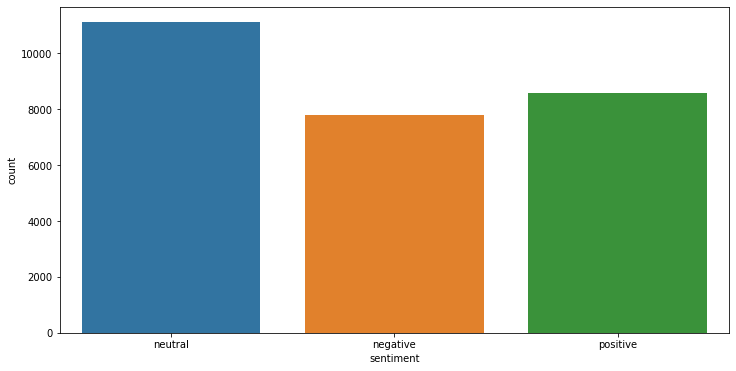

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train)

### Funnel-Chart 
한층한층 분석하는 과정에서 사용된다. 결국 밑에 있는 값(결과)을 얻는 과정에서 어떤일이 일어나고있는지 분석하는것.

In [73]:
fig = go.Figure(go.Funnelarea(
    text = tmp['sentiment'],
    values = tmp['text'],
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

#### Sentiment 데이터에서 알 수 있는 것

- selected_text가 텍스트의 하위 집합임을 알고 있다.
    - 우리는 selected_text가 텍스트의 한 세그먼트만 포함한다는 것을 알고 있다.
    즉, 두 문장 사이를 건너뛰지 않는다.
- selected_text가 단어 사이에서 시작되므로 selected_text가 항상 의미가 있는 것은 아니라는 의견

적용할 수 있는 방법론 
- Selected_text와 text의 단어 수 차이
- 텍스트와 Selected_text 사이의 Jaccard 유사성 점수

왜 자카드유사도인가?
- 

# Jacacard 

In [74]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [75]:
def jaccard(str1, str2): 
    doc1 = set(str1.lower().split()) 
    doc2 = set(str2.lower().split())
    doc_intersection =doc1.intersection(doc2)
    return float(len(doc_intersection)) / (len(doc1) + len(doc2) - len(doc_intersection))

### iterrows()

In [76]:
for idx, row in tqdm(train.iterrows()):
    sentence1 = row['text']
    sentence2 = row['selected_text']
    print(row)
    print()
    if idx == 2:
        break

2it [00:00, 904.43it/s]

textID                                     cb774db0d1
text              I`d have responded, if I were going
selected_text     I`d have responded, if I were going
sentiment                                     neutral
Name: 0, dtype: object

textID                                               549e992a42
text              Sooo SAD I will miss you here in San Diego!!!
selected_text                                          Sooo SAD
sentiment                                              negative
Name: 1, dtype: object

textID                          088c60f138
text             my boss is bullying me...
selected_text                  bullying me
sentiment                         negative
Name: 2, dtype: object



### 자카드 유사도 컬럼 생성

In [77]:
results_jaccard=[]

for idx, row in tqdm(train.iterrows()):
    sentence1 = row['text']
    sentence2 = row['selected_text']

    jaccard_score = jaccard(sentence1,sentence2)
    results_jaccard.append(jaccard_score)
    
train["jaccard_score"] = results_jaccard

27480it [00:01, 19371.87it/s]


In [78]:
train.head()

,textID,text,selected_text,sentiment,jaccard_score
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286


In [79]:
train['Num_words_selected'] = train['selected_text'].apply(lambda x:len(str(x).split())) #Number Of words in Selected Text
train['Num_word_text'] = train['text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
train['difference_words'] = train['Num_word_text'] - train['Num_words_selected'] #Difference in Number of words text and Selected Text

- selected_text와 text 각 문장에 포함된 단어 수를 구하고
두 컬럼의 문자 개수 차이를 저장

# EDA



In [80]:
train.head()

,textID,text,selected_text,sentiment,jaccard_score,Num_words_selected,Num_word_text,difference_words
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000,2,10,8
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667,2,5,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000,3,5,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286,3,14,11


- 생성된 Feature들의 분포를 살펴보자.

In [81]:
hist_data = [train['Num_words_selected'],train['Num_word_text']]
group_labels = ['Selected_Text', 'Text']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,show_curve=False)
fig.update_layout(title_text='Distribution of Number Of words')
fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor="LightSteelBlue",
)
fig.show()

- 단어 수가 25개 이상인 트윗은 매우 적다.
    - 따라서 분포가 오른쪽으로 치우쳐져있다.  

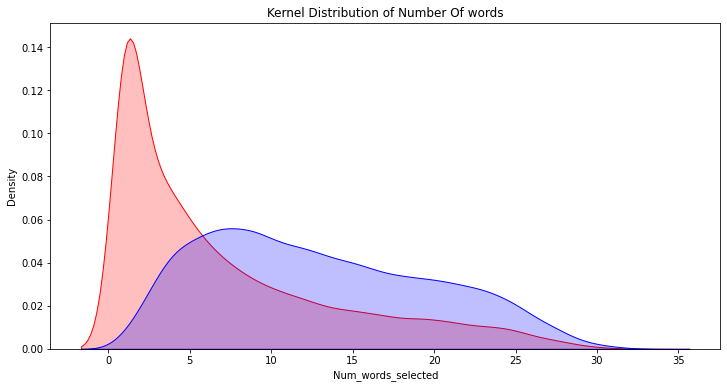

In [82]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train['Num_words_selected'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(train['Num_word_text'], shade=True, color="b")

- 서로 다른 감정 분류에 따른 단어 간 차이와, 자카드 유사도 차이를 살펴봐야할 듯

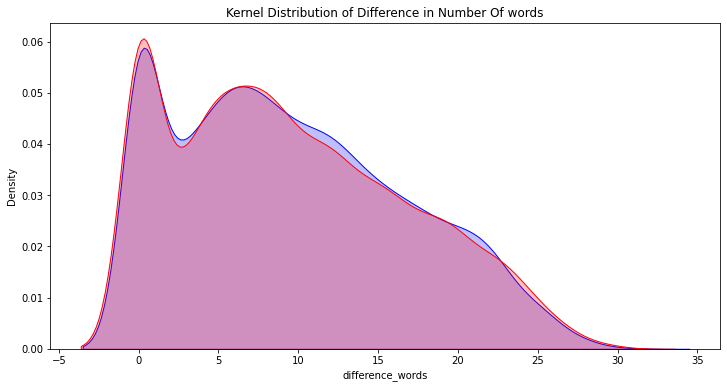

In [83]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train[train['sentiment']=='positive']['difference_words'], shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(train[train['sentiment']=='negative']['difference_words'], shade=True, color="r")

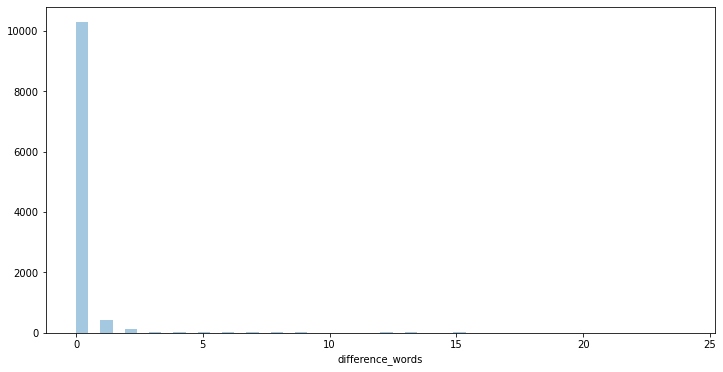

In [84]:
plt.figure(figsize=(12,6))
sns.distplot(train[train['sentiment']=='neutral']['difference_words'],kde=False)

- 중립의 경우 단어 수 차이에 대해 대부분 0인 값이 들어있어 분포를 알아내기 
어렵다.
    - text와 selected_text가 동일한 경우일 것

- 따라서 자카드 유사도 지수를 이용하여 분포가 어떻게 다른지 좀 더 자세히 확인

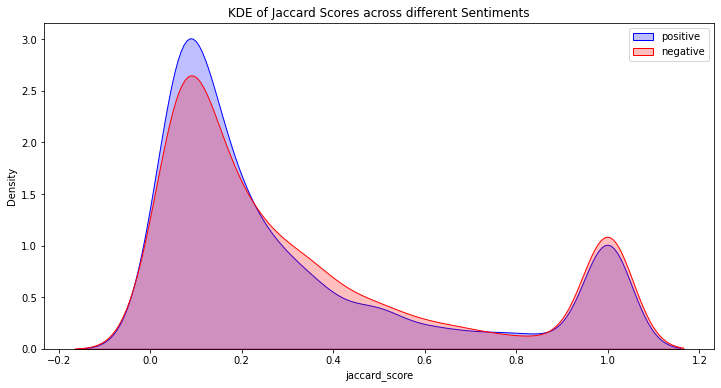

In [85]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train[train['sentiment']=='positive']['jaccard_score'], shade=True, color="b").set_title('KDE of Jaccard Scores across different Sentiments')
p2=sns.kdeplot(train[train['sentiment']=='negative']['jaccard_score'], shade=True, color="r")
plt.legend(labels=['positive','negative'])

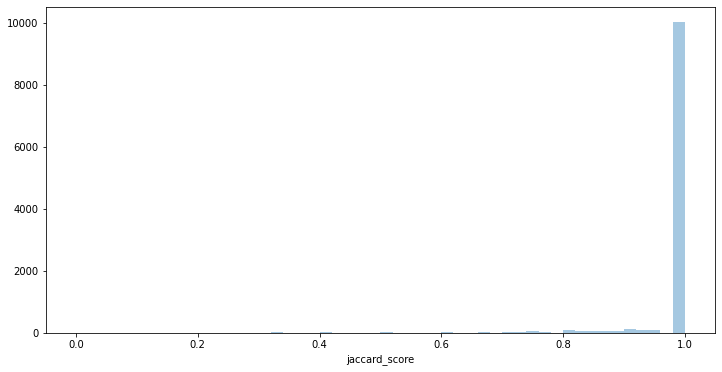

In [86]:
plt.figure(figsize=(12,6))
sns.distplot(train[train['sentiment']=='neutral']['jaccard_score'],kde=False)

- 여기서 몇 가지 흥미로운 동향을 확인할 수 있다:

    - 긍정적인 트윗과 부정적인 트윗은 첨도가 높기 때문에 값이 좁고 밀도가 높은 두 영역에 집중된다
- 중립 트윗은 첨도 값이 낮고 값이 1에 분포가 몰려있음을 확인할 수 있었다. (유사도가 매우 높은 것으로 보임)

```
첨도법은 분포가 정점에 도달한 정도와 해당 정점 주위의 산포가 얼마나 되는지를 나타내는 측도
왜도는 곡선이 정규 분포에서 얼마나 이탈하는지 측정.
```

## EDA 결론
Jaccard 점수 그림에서 점수 1 주위에 음수 및 양수 그림에 대한 피크가 있음을 알 수 있습니다.
그것은 텍스트와 선택된 텍스트 사이에 높은 유사성이 있는 트윗 클러스터가 있다는 것을 의미합니다. 
만약 우리가 그 클러스터를 찾을 수 있다면, 우리는 세그먼트에 관계없이 해당 트윗에 대한 선택된 텍스트의 텍스트를 예측할 수 있습니다
우리가 그 클러스터들을 찾을 수 있는지 보자, 한 가지 흥미로운 아이디어는 text가 완전히 text로 사용될 수 있기 때문에 텍스트의 단어 수가 3개 미만인 트윗을 확인하는 것이다

In [87]:
k = train[train['Num_word_text']<=2]
k.groupby('sentiment').mean()['jaccard_score']

sentiment
negative    0.788580
neutral     0.977805
positive    0.765700
Name: jaccard_score, dtype: float64

In [88]:
k[k['sentiment']=='positive']

,textID,text,selected_text,sentiment,jaccard_score,Num_words_selected,Num_word_text,difference_words
68,fa2654e730,Chilliin,Chilliin,positive,1.0,1,1,0
80,bbbc46889b,THANK YYYYYYYYYOOOOOOOOOOUUUUU!,THANK YYYYYYYYYOOOOOOOOOOUUUUU!,positive,1.0,2,2,0
170,f3d95b57b1,good morning,good morning,positive,1.0,2,2,0
278,89d5b3f0b5,Thanks,Thanks,positive,1.0,1,1,0
430,a78ef3e0d0,Goodmorning,Goodmorning,positive,1.0,1,1,0
...,...,...,...,...,...,...,...,...
26690,e80c242d6a,Goodnight;,Goodnight;,positive,1.0,1,1,0
26726,aad244f37d,*hug*,*hug*,positive,1.0,1,1,0
26843,a46571fe12,congrats!,congrats!,positive,1.0,1,1,0
26960,49a942e9b1,Happy birthday.,Happy birthday.,positive,1.0,2,2,0


In [89]:
k[k['sentiment']=='negative']

,textID,text,selected_text,sentiment,jaccard_score,Num_words_selected,Num_word_text,difference_words
26,852edc3769,I`m sorry.,I`m sorry.,negative,1.0,2,2,0
124,f0460d611d,not well,not well,negative,1.0,2,2,0
144,7e4ed52c4a,Hate fighting,Hate fighting,negative,1.0,2,2,0
218,a8734230b6,Ew traffic,Ew traffic,negative,1.0,2,2,0
329,0404648e1c,?sucks!?..,?sucks!?..,negative,1.0,1,1,0
...,...,...,...,...,...,...,...,...
26260,cfedf94a53,"ohh, ouch",ouch,negative,0.5,1,2,1
26754,b6f6bd82c0,careless,careless,negative,1.0,1,1,0
26798,0e2f13043e,reaaaallly bored,reaaaallly bored,negative,1.0,2,2,0
26851,b732cd6641,I`m sorry,I`m sorry,negative,1.0,2,2,0


In [90]:
k[k['sentiment']=='neutral']

,textID,text,selected_text,sentiment,jaccard_score,Num_words_selected,Num_word_text,difference_words
7,50e14c0bb8,Soooo high,Soooo high,neutral,1.0,2,2,0
42,2e7082d1c8,MAYDAY?!,MAYDAY?!,neutral,1.0,1,1,0
61,a4b0888da6,haha yes,haha yes,neutral,1.0,2,2,0
111,f0c1601d8b,has tickets.......?,has tickets.......?,neutral,1.0,2,2,0
127,8e1583cb08,Absolutely,Absolutely,neutral,1.0,1,1,0
...,...,...,...,...,...,...,...,...
27236,b6ffd0c214,Doctors appt,Doctors appt,neutral,1.0,2,2,0
27252,a68443a78b,This year,This year,neutral,1.0,2,2,0
27281,adb7ab12f3,stop itt!,stop itt!,neutral,1.0,2,2,0
27422,b3270b06a3,"Plan, successful?","Plan, successful?",neutral,1.0,2,2,0


- 대부분의 경우 text가 selected_text로 사용되는 것을 알 수 있다.
- 단어 길이가 3보다 작은 텍스트를 전처리해보자



# 전처리

In [91]:
def clean_text(text):
    '''
    텍스트 소문자 만들기, 
    대괄호 안의 텍스트 제거, 
    링크 제거, 
    모든 구두점 제거
    숫자가 포함된 단어 제거
    '''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [92]:
train['text'] = train['text'].apply(lambda x:clean_text(x))
train['selected_text'] = train['selected_text'].apply(lambda x:clean_text(x))

In [93]:
train.head()

,textID,text,selected_text,sentiment,jaccard_score,Num_words_selected,Num_word_text,difference_words
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,1.000000,7,7,0
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,0.200000,2,10,8
2,088c60f138,my boss is bullying me,bullying me,negative,0.166667,2,5,3
3,9642c003ef,what interview leave me alone,leave me alone,negative,0.600000,3,5,2
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,0.214286,3,14,11


# Text Analysis 

## Most Common words in our Target-Selected Text

In [94]:
train['tmp_list'] = train['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['tmp_list'] for item in sublist])

tmp = pd.DataFrame(top.most_common(20))
tmp.columns = ['Common_words','count']
tmp.style.background_gradient(cmap='Blues')

,Common_words,count
0,i,7200
1,to,5305
2,the,4590
3,a,3538
4,my,2783
5,you,2624
6,and,2321
7,it,2158
8,is,2115
9,in,1986


In [95]:
fig = px.bar(tmp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

- 우웃 
- stopwords를 제거하지 않았기 때문에 가장 자주 쓰이는 단어가 'to'라는 것을 볼 수 있었다. 
- stopwords를 지정하여 제거한 후 다시 시도해 보자

In [96]:
import nltk
nltk.download('stopwords')

def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')] 
    # stopwords에 포함되지 않은 단어만 리스트에 포함시킨다. 

train['tmp_list'] = train['tmp_list'].apply(lambda x:remove_stopword(x))
# remove_stopword를 적용 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
top = Counter([item for sublist in train['tmp_list'] for item in sublist])

temp = pd.DataFrame(top.most_common(20)) # most_common이라는 메서드를 지원해주는듯!!

temp = temp.iloc[1:,:] #i'm 
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,good,1251
2,day,1058
3,love,909
4,happy,852
5,like,774
6,get,772
7,dont,765
8,go,700
9,cant,613
10,work,612


In [98]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

## Most Common words in Text

In [99]:
train['text_word_list'] = train['text'].apply(lambda x:str(x).split()) #List of words in every row for text
train['text_word_list'] = train['text_word_list'].apply(lambda x:remove_stopword(x)) #Removing Stopwords

In [100]:
top = Counter([item for sublist in train['text_word_list'] for item in sublist])

text_words = pd.DataFrame(top.most_common(25))
text_words = text_words.iloc[:,:]
text_words.columns = ['Common_words','count']
text_words.style.background_gradient(cmap='Blues')

,Common_words,count
0,im,3020
1,day,2044
2,good,1549
3,get,1426
4,like,1346
5,go,1267
6,dont,1200
7,love,1122
8,work,1112
9,going,1096


첫 번째 공통 단어는 I'm이기 때문에 두 번째 줄에서 데이터를 가져왔다.

In [101]:
top = Counter([item for sublist in train['text_word_list'] for item in sublist])

text_words = pd.DataFrame(top.most_common(25))
text_words = text_words.iloc[1:,:]
text_words.columns = ['Common_words','count']
text_words.style.background_gradient(cmap='Blues')

,Common_words,count
1,day,2044
2,good,1549
3,get,1426
4,like,1346
5,go,1267
6,dont,1200
7,love,1122
8,work,1112
9,going,1096
10,today,1096


In [102]:
fig = px.bar(text_words, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [103]:
fig = px.treemap(text_words, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

- selected_text와 text에서 공통으로 자주 쓰이는 단어가 어느 정도 비슷해보인다. 

## Most common words Sentiments Wise

- 주어진 Sentiments별로 자주 쓰이는 단어를 알아보자. 

In [104]:
Positive_sent = train[train['sentiment']=='positive']
Negative_sent = train[train['sentiment']=='negative']
Neutral_sent = train[train['sentiment']=='neutral']

In [105]:
Positive_sent

,textID,text,selected_text,sentiment,jaccard_score,Num_words_selected,Num_word_text,difference_words,tmp_list,text_word_list
6,6e0c6d75b1,feedings for the baby are fun when he is all ...,fun,positive,0.071429,1,14,13,[fun],"[feedings, baby, fun, smiles, coos]"
9,fc2cbefa9d,journey wow u just became cooler hehe is tha...,wow u just became cooler,positive,0.500000,5,10,5,"[wow, u, became, cooler]","[journey, wow, u, became, cooler, hehe, possible]"
11,16fab9f95b,i really really like the song love story by ta...,like,positive,0.100000,1,11,10,[like],"[really, really, like, song, love, story, tayl..."
21,e48b0b8a23,playing ghost online is really interesting the...,interesting,positive,0.043478,1,24,23,[interesting],"[playing, ghost, online, really, interesting, ..."
25,e00c6ef376,the free fillin app on my ipod is fun im addicted,the free fillin app on my ipod is fun im addicted,positive,1.000000,11,11,0,"[free, fillin, app, ipod, fun, im, addicted]","[free, fillin, app, ipod, fun, im, addicted]"
...,...,...,...,...,...,...,...,...,...,...
27467,432e6de6c9,morning twitfriends welcome to my new followers,welcome,positive,0.142857,1,7,6,[welcome],"[morning, twitfriends, welcome, new, followers]"
27474,8f14bb2715,so i get up early and i feel good about the da...,i feel good ab,positive,0.130435,4,27,23,"[feel, good, ab]","[get, early, feel, good, day, walk, work, im, ..."
27475,b78ec00df5,enjoy ur night,enjoy,positive,0.333333,1,3,2,[enjoy],"[enjoy, ur, night]"
27478,f67aae2310,yay good for both of you enjoy the break you...,yay good for both of you,positive,0.272727,6,22,16,"[yay, good]","[yay, good, enjoy, break, probably, need, hect..."


### positive

In [106]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['tmp_list'] for item in sublist])

temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,good,826
1,happy,730
2,love,697
3,day,456
4,thanks,439
5,great,364
6,fun,287
7,nice,267
8,mothers,259
9,hope,245


In [107]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### negative

In [108]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['tmp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))

temp_negative = temp_negative.iloc[1:,:] # i'm 제거 
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,miss,358
2,sad,343
3,sorry,300
4,bad,246
5,hate,230
6,dont,221
7,cant,201
8,sick,166
9,like,162
10,sucks,159


In [109]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

### neutral

In [110]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['tmp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))

temp_neutral = temp_neutral.loc[1:,:] # i'm 제거
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,get,612
2,go,569
3,day,492
4,dont,482
5,going,472
6,work,467
7,like,445
8,got,441
9,today,427
10,lol,427


In [111]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [112]:
fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

## 결론
- get, go, dont, got, u, cant, lol과 같은 단어들이 세 부분 모두에서 공통적으로 들어간다.
- dont와 cant와 같은 단어들은 부정적인 성격이고 lol과 같은 단어들은 긍정적인 성격이기 때문에 중립 데이터에 잘못 라벨링된 값들이 있는 것 같다는 생각이 든다.

더 해야할 일
- 각 세그먼트 별로 유니크한 단어를 찾는다. 
- N-그램 분석을 통해 더 많은 인사이트를 찾아보도록 하자.

## 세 가지의 각 Segment별로 유니크한 단어 찾기



In [113]:
raw_text = [word for word_list in train['text_word_list'] for word in word_list]

In [114]:
raw_text[70:100]

['voice',
 'test',
 'test',
 'lg',
 'uh',
 'oh',
 'sunburned',
 'sok',
 'trying',
 'plot',
 'alternatives',
 'speak',
 'sigh',
 'ive',
 'sick',
 'past',
 'days',
 'thus',
 'hair',
 'looks',
 'wierd',
 'didnt',
 'hat',
 'would',
 'look',
 'back',
 'home',
 'gonna',
 'miss',
 'every']

입력
- (sentiment 범주, 보고 싶은 특정 단어의 수, train_data 의 text_word_list)

출력
- 특정 단어의 발생 빈도에 대한 데이터프레임(내림차순 정렬)을 반환

In [115]:
def words_unique(sentiment,numwords,raw_words):
    allother = []
    for item in train[train.sentiment != sentiment]['text_word_list']:
        for word in item:
            allother.append(word)
    allother  = list(set(allother))
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in train[train.sentiment == sentiment]['text_word_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

### positive tweets

In [116]:
Unique_Positive= words_unique('positive', 20, raw_text)

print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,congratulations,29
1,thnx,10
2,appreciated,8
3,shared,7
4,presents,7
5,greetings,7
6,blessings,6
7,mothersday,6
8,mcr,6
9,coolest,6


In [117]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Positive Words')
fig.show()

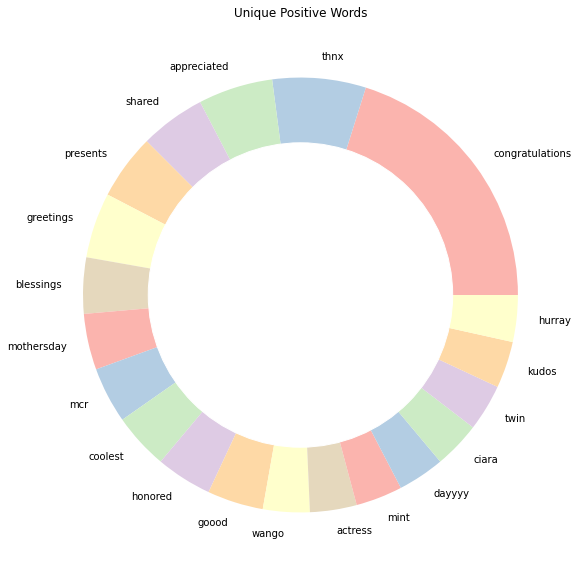

In [118]:
from palettable.colorbrewer.qualitative import Pastel1_7

plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')

plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Unique Positive Words')
plt.show()

### negative tweets

In [119]:
Unique_Negative= words_unique('negative', 10, raw_text)

print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,ache,12
1,suffering,9
2,allergic,7
3,cramps,7
4,saddest,7
5,pissing,7
6,sob,6
7,dealing,6
8,devastated,6
9,noes,6


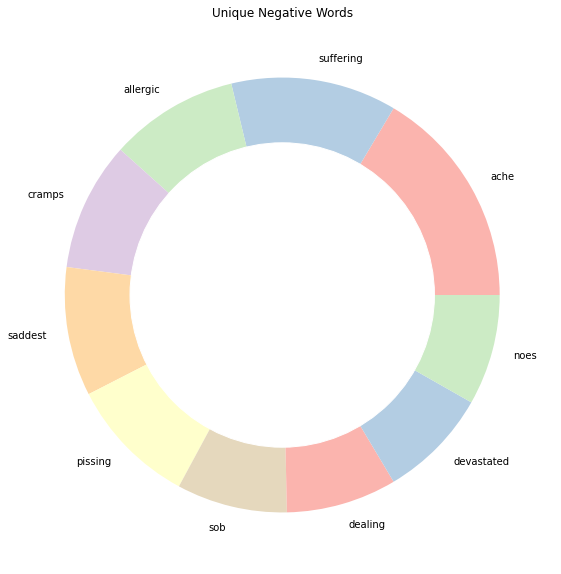

In [120]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.rcParams['text.color'] = 'black'

plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_7.hex_colors)

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Unique Negative Words')
plt.show()

### neutral tweets

In [121]:
Unique_Neutral= words_unique('neutral', 10, raw_text)

print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Oranges')

The top 10 unique words in Neutral Tweets are:


,words,count
0,settings,9
1,explain,7
2,mite,6
3,hiya,6
4,reader,5
5,pr,5
6,sorta,5
7,fathers,5
8,enterprise,5
9,guessed,5


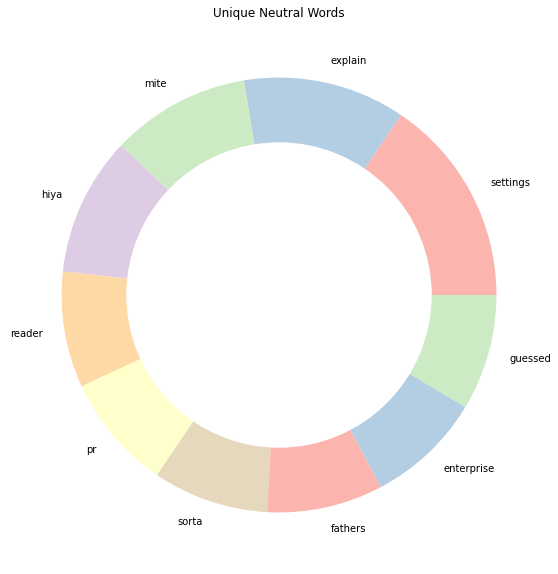

In [122]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')

plt.pie(Unique_Neutral['count'], labels=Unique_Neutral.words, colors=Pastel1_7.hex_colors)

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Unique Neutral Words')
plt.show()

### 결론
- 이렇게 출력된 유니크한 단어들은 트윗의 감정을 결정하는 매우 강력한 요소

# Modeling

## 개체명 인식(Named Entity Recognition)

### NER이란? 
✔️ [개체명 인식(Named Entity Recognition)이란?](https://wikidocs.net/30682) - wikidocs.net
- 개체명 인식(Named Entity Recognition)이란 말 그대로 이름을 가진 개체(named entity)를 인식하겠다는 것을 의미한다. 
    - 좀 더 쉽게 설명하면, 어떤 이름을 의미하는 단어를 보고는 그 단어가 어떤 유형인지를 인식하는 것.

예를 들어 `유정이는 2018년에 골드만삭스에 입사했다. `라는 문장이 있을 때,    
사람(person), 조직(organization), 시간(time)에 대해 개체명 인식을 수행하는 모델이라면 다음과 같은 결과를 보여준다.
```
유정 - 사람  
2018년 - 시간  
골드만삭스 - 조직
```

### NLTK를 이용한 개체명 인식(Named Entity Recognition using NTLK)
예제
- NLTK에서는 개체명 인식기(NER chunker)를 지원하고 있으므로, 별도 개체명 인식기를 구현할 필요없이 NLTK를 사용해서 개체명 인식을 수행할 수 있다.
- `ne_chunk()`는 개체명을 태깅하기 위해서 앞서 품사 태깅(pos_tag)이 수행되어야 함.

In [123]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [124]:
from nltk import word_tokenize, pos_tag, ne_chunk


sentence = "James is working at Disney in London"

# 토큰화 후 품사 태깅
tokenized_sentence = pos_tag(word_tokenize(sentence))
print(tokenized_sentence)

[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Disney', 'NNP'), ('in', 'IN'), ('London', 'NNP')]


In [125]:
# 개체명 인식
ner_sentence = ne_chunk(tokenized_sentence)
print(ner_sentence)

(S
  (PERSON James/NNP)
  is/VBZ
  working/VBG
  at/IN
  (ORGANIZATION Disney/NNP)
  in/IN
  (GPE London/NNP))


-  James는 PERSON(사람), Disney는 조직(ORGANIZATION), London은 위치(GPE)라고 정상적으로 개체명 인식이 수행된 것을 확인할 수 있다. 

**Reference**    
📌 [개체명 인식의 BIO 표현 이해하기](https://wikidocs.net/24682)   
📌 [BiLSTM을 이용한 개체명 인식(Named Entity Recognition, NER)](https://wikidocs.net/147219)   
📌 [BiLSTM-CRF를 이용한 개체명 인식](https://wikidocs.net/147234)    
📌 [개체명 인식기의 성능을 향상시키기 | 문자 임베딩 활용하기](https://wikidocs.net/147299)    

### SpaCy를 활용한 Modelling (the Problem as NER)
- NER은 텍스트 덩어리에서 명명된 개체(사람, 장소, 조직 등)를 발견하고 미리 정의된 범주 집합으로 분류하는 표준 NLP 문제이다.
- jaccard 유사성이 높게 나온 모든 중립 트윗에 대해 text를 selected_text로 사용할 것이다.
- 앞에서 설명한 바와 같이 텍스트의 단어 수가 3개 미만인 모든 트윗에 대해 텍스트를 selected_text로 사용할 것이다. 
- 긍정적인 트윗과 부정적인 트윗  두 가지 모델을 학습시킬 것.
    - selected_text에 원본 텍스트가 포함되어 있으므로 데이터를 사전 처리하지 않는다.

In [126]:
train = pd.read_csv(f'{BASE_PATH}/tweet-sentiment-extraction/train.csv')
test = pd.read_csv(f'{BASE_PATH}/tweet-sentiment-extraction/test.csv')
sample_submission = pd.read_csv(f'{BASE_PATH}/tweet-sentiment-extraction/sample_submission.csv')

In [127]:
train['num_words_text'] = train['text'].apply(lambda x:len(str(x).split())) #Number Of words in main Text in train set
train = train.dropna()
train = train[train['num_words_text']>=3]

#### 사용자 지정 입력으로 **Spacy NER** 모델 학습시키기
- [Spacy NER 자료](https://spacy.io/usage/training#ner)

#### **🚀 Model 학습시키는 코드**
[NER - training using spacy (Ensemble)](https://www.kaggle.com/code/rohitsingh9990/ner-training-using-spacy-ensemble?scriptVersionId=33726585)

#### **🚀 Model 다운로드** 
✅ [tse_spacy_model](https://www.kaggle.com/datasets/rohitsingh9990/tse-spacy-model)
- model_neg
- model_neu
- model_pos

In [128]:
import spacy
from __future__ import unicode_literals, print_function
import random
from spacy.util import minibatch, compounding
from pathlib import Path
from spacy.training.example import Example

In [129]:
def save_model(output_dir, nlp, new_model_name):
    output_dir = f'../working/{output_dir}'
    if output_dir is not None:        
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        nlp.meta["name"] = new_model_name
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

In [130]:
# pass model = nlp if you want to train on top of existing model 

def trainning(train_data, output_dir, n_iter=20, model=None):
    """Load the model, set up the pipeline and train the entity recognizer."""
    ""
    if model is not None:
        nlp = spacy.load(output_dir)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")
    
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    
    if "ner" not in nlp.pipe_names:
        # spaCy 3.0부터 add_pipe에 한꺼번에 입력하는 방법으로 바뀜 
        ner = nlp.add_pipe("ner", last=True)
    else:
        ner = nlp.get_pipe("ner")
    
    # add labels
    for _, annotations in train_data:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # sizes = compounding(1.0, 4.0, 1.001)
        # batch up the examples using spaCy's minibatch
        if model is None:
            nlp.begin_training()
        else:
            nlp.resume_training()

        for itn in tqdm(range(n_iter)):
            random.shuffle(train_data)
            batches = minibatch(train_data, size=compounding(4.0, 500.0, 1.001))    
            losses = {}
            # spaCy version 3.0부터 코드가 많이 다름 
            for batch in batches:
                texts, annotations = zip(*batch)

                examples = []
                for i in range(len(texts)):
                    doc = nlp.make_doc(texts[i])
                    examples.append(Example.from_dict(doc, annotations[i]))

                nlp.update(examples, drop=0.5, losses=losses)
            
            print("Losses", losses)
    save_model(output_dir, nlp, 'st_ner')

In [131]:
def get_model_out_path(sentiment):
    model_out_path = f'{BASE_PATH}/working/'
    if sentiment == 'positive':
        model_out_path = 'models/model_pos'
    elif sentiment == 'negative':
        model_out_path = 'models/model_neg'
    else:
        model_out_path = 'models/model_neu'
    return model_out_path

In [132]:
## creating data in spacy data input format

def get_training_data(sentiment):
    train_data = []
    for index, row in train.iterrows():
        if row.sentiment == sentiment:
            selected_text = row.selected_text
            text = row.text
            start = text.find(selected_text)
            end = start + len(selected_text)
            train_data.append((text, {"entities": [[start, end, 'selected_text']]}))
    return train_data

In [133]:
positive = 'positive'
negative = 'negative'
neutral = 'neutral'

train_pos = get_training_data(positive)
model_path_pos = get_model_out_path(positive)

train_neg = get_training_data(negative)
model_path_neg = get_model_out_path(negative)

train_neu = get_training_data(neutral)
model_path_neu = get_model_out_path(neutral)

In [134]:
train_pos

[('2am feedings for the baby are fun when he is all smiles and coos',
  {'entities': [[30, 33, 'selected_text']]}),
 (' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
  {'entities': [[11, 39, 'selected_text']]}),
 ('I really really like the song Love Story by Taylor Swift',
  {'entities': [[16, 20, 'selected_text']]}),
 ('Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet',
  {'entities': [[31, 43, 'selected_text']]}),
 ('the free fillin` app on my ipod is fun, im addicted',
  {'entities': [[0, 51, 'selected_text']]}),
 ('juss came backk from Berkeleyy ; omg its madd fun out there  havent been out there in a minute . whassqoodd ?',
  {'entities': [[46, 49, 'selected_text']]}),
 ('I`m going home now. Have you seen my new twitter design? Quite....heavenly isn`****?',
  {'entities': [[57, 74, 'selected_text']]}),
 ('i hope unni will make the audition . fighting dahye unni !',
  {'e

In [135]:
# for demo purpose i am just training the model for 2 iterations, feel free to experiment.
trainning(train_pos, model_path_pos, n_iter=30, model=None)

Created blank 'en' model


  3%|▎         | 1/30 [00:45<21:52, 45.27s/it]

Losses {'ner': 12933.540287773612}


  7%|▋         | 2/30 [01:41<24:08, 51.73s/it]

Losses {'ner': 11673.628843753802}


 10%|█         | 3/30 [02:41<24:59, 55.53s/it]

Losses {'ner': 11474.683632769225}


 13%|█▎        | 4/30 [03:37<24:12, 55.86s/it]

Losses {'ner': 11292.197625279981}


 17%|█▋        | 5/30 [04:22<21:35, 51.80s/it]

Losses {'ner': 11047.176033477743}


 20%|██        | 6/30 [05:07<19:50, 49.61s/it]

Losses {'ner': 10910.79422383111}


 23%|██▎       | 7/30 [05:57<18:58, 49.50s/it]

Losses {'ner': 10777.819266325969}


 27%|██▋       | 8/30 [06:43<17:50, 48.64s/it]

Losses {'ner': 10730.190005762015}


 30%|███       | 9/30 [07:28<16:32, 47.25s/it]

Losses {'ner': 10602.22267634575}


 33%|███▎      | 10/30 [08:14<15:38, 46.93s/it]

Losses {'ner': 10452.683064439603}


 37%|███▋      | 11/30 [08:58<14:33, 45.96s/it]

Losses {'ner': 10419.34750942952}


 40%|████      | 12/30 [09:41<13:32, 45.14s/it]

Losses {'ner': 10412.265944446306}


 43%|████▎     | 13/30 [10:25<12:40, 44.72s/it]

Losses {'ner': 10279.31758006151}


 47%|████▋     | 14/30 [11:09<11:53, 44.60s/it]

Losses {'ner': 10235.688993562784}


 50%|█████     | 15/30 [11:52<11:04, 44.27s/it]

Losses {'ner': 10162.6223443762}


 53%|█████▎    | 16/30 [12:36<10:14, 43.91s/it]

Losses {'ner': 10045.355262778197}


 57%|█████▋    | 17/30 [13:19<09:29, 43.83s/it]

Losses {'ner': 10036.021825078751}


 60%|██████    | 18/30 [14:05<08:54, 44.57s/it]

Losses {'ner': 10079.626539389754}


 63%|██████▎   | 19/30 [14:49<08:07, 44.33s/it]

Losses {'ner': 9976.498405756634}


 67%|██████▋   | 20/30 [15:35<07:27, 44.77s/it]

Losses {'ner': 9888.748525964242}


 70%|███████   | 21/30 [16:37<07:30, 50.06s/it]

Losses {'ner': 9865.226639549022}


 73%|███████▎  | 22/30 [17:25<06:35, 49.41s/it]

Losses {'ner': 9749.164328550312}


 77%|███████▋  | 23/30 [18:11<05:38, 48.43s/it]

Losses {'ner': 9770.404678893956}


 80%|████████  | 24/30 [18:56<04:43, 47.25s/it]

Losses {'ner': 9685.301917390147}


 83%|████████▎ | 25/30 [19:41<03:52, 46.51s/it]

Losses {'ner': 9723.969953696374}


 87%|████████▋ | 26/30 [20:25<03:02, 45.74s/it]

Losses {'ner': 9543.3465922018}


 90%|█████████ | 27/30 [21:10<02:16, 45.54s/it]

Losses {'ner': 9537.428940876087}


 93%|█████████▎| 28/30 [21:53<01:29, 44.75s/it]

Losses {'ner': 9539.456811402932}


 97%|█████████▋| 29/30 [22:36<00:44, 44.43s/it]

Losses {'ner': 9464.024163923375}


100%|██████████| 30/30 [23:20<00:00, 46.68s/it]

Losses {'ner': 9392.206547918966}
Saved model to ../working/models/model_pos


In [136]:
trainning(train_neg, model_path_neg, n_iter=30, model=None)

Created blank 'en' model


  3%|▎         | 1/30 [00:40<19:45, 40.89s/it]

Losses {'ner': 12418.402178716637}


  7%|▋         | 2/30 [01:21<19:03, 40.85s/it]

Losses {'ner': 11361.23229040148}


 10%|█         | 3/30 [02:02<18:24, 40.91s/it]

Losses {'ner': 11096.00254822302}


 13%|█▎        | 4/30 [02:43<17:46, 41.01s/it]

Losses {'ner': 10876.590162316024}


 17%|█▋        | 5/30 [03:24<17:03, 40.96s/it]

Losses {'ner': 10756.731036713065}


 20%|██        | 6/30 [04:05<16:21, 40.89s/it]

Losses {'ner': 10644.760511228487}


 23%|██▎       | 7/30 [04:46<15:44, 41.06s/it]

Losses {'ner': 10502.510748933077}


 27%|██▋       | 8/30 [05:27<15:00, 40.93s/it]

Losses {'ner': 10370.081084342994}


 30%|███       | 9/30 [06:10<14:31, 41.48s/it]

Losses {'ner': 10201.063793521353}


 33%|███▎      | 10/30 [06:50<13:44, 41.23s/it]

Losses {'ner': 10225.13465262858}


 37%|███▋      | 11/30 [07:32<13:03, 41.23s/it]

Losses {'ner': 10185.218152905414}


 40%|████      | 12/30 [08:13<12:20, 41.15s/it]

Losses {'ner': 10088.535838172222}


 43%|████▎     | 13/30 [08:53<11:37, 41.04s/it]

Losses {'ner': 9936.533701520419}


 47%|████▋     | 14/30 [09:34<10:53, 40.83s/it]

Losses {'ner': 9890.071225351527}


 50%|█████     | 15/30 [10:20<10:37, 42.49s/it]

Losses {'ner': 9828.383536216623}


 53%|█████▎    | 16/30 [11:05<10:03, 43.10s/it]

Losses {'ner': 9766.516213108265}


 57%|█████▋    | 17/30 [11:46<09:12, 42.53s/it]

Losses {'ner': 9711.366707358855}


 60%|██████    | 18/30 [12:27<08:25, 42.10s/it]

Losses {'ner': 9649.508211115824}


 63%|██████▎   | 19/30 [13:08<07:39, 41.77s/it]

Losses {'ner': 9671.048074970071}


 67%|██████▋   | 20/30 [13:50<06:57, 41.73s/it]

Losses {'ner': 9583.816361554822}


 70%|███████   | 21/30 [14:31<06:13, 41.51s/it]

Losses {'ner': 9511.631670348072}


 73%|███████▎  | 22/30 [15:11<05:30, 41.26s/it]

Losses {'ner': 9502.384939713502}


 77%|███████▋  | 23/30 [15:52<04:47, 41.06s/it]

Losses {'ner': 9412.666163032567}


 80%|████████  | 24/30 [16:33<04:05, 40.99s/it]

Losses {'ner': 9438.500664608273}


 83%|████████▎ | 25/30 [17:13<03:24, 40.93s/it]

Losses {'ner': 9369.341372597357}


 87%|████████▋ | 26/30 [17:55<02:44, 41.02s/it]

Losses {'ner': 9240.651726586902}


 90%|█████████ | 27/30 [18:35<02:02, 40.97s/it]

Losses {'ner': 9237.572885368349}


 93%|█████████▎| 28/30 [19:16<01:21, 40.90s/it]

Losses {'ner': 9154.210246665694}


 97%|█████████▋| 29/30 [19:56<00:40, 40.70s/it]

Losses {'ner': 9222.86014351689}


100%|██████████| 30/30 [20:37<00:00, 41.25s/it]

Losses {'ner': 9018.82084138949}
Saved model to ../working/models/model_neg


In [138]:
def predict_entities(text, model):
    doc = model(text)
    ent_array = []
    for ent in doc.ents:
        start = text.find(ent.text)
        end = start + len(ent.text)
        new_int = [start, end, ent.label_]
        if new_int not in ent_array:
            ent_array.append([start, end, ent.label_])
    selected_text = text[ent_array[0][0]: ent_array[0][1]] if len(ent_array) > 0 else text
    return selected_text

In [150]:
selected_texts = []
MODELS_BASE_PATH = f'{BASE_PATH}/working/models/'

if MODELS_BASE_PATH is not None:
    print("Loading Models  from ", MODELS_BASE_PATH)
    model_pos = spacy.load(MODELS_BASE_PATH + 'model_pos')
    model_neg = spacy.load(MODELS_BASE_PATH + 'model_neg')
        
    for index, row in test.iterrows():
        text = row.text
        output_str = ""
        if row.sentiment == 'neutral' or len(text.split()) <= 2:
            selected_texts.append(text)
        elif row.sentiment == 'positive':
            selected_texts.append(predict_entities(text, model_pos))
        else:
            selected_texts.append(predict_entities(text, model_neg))
        
test['selected_text'] = selected_texts

Loading Models  from  /content/drive/MyDrive/캐굴캐굴/2주차/working/models/


OSError: ignored

버전 이슈 😭   
To solve the issues, install these versions:
```
pip install nltk
pip install spacy==2.3.5
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz
pip install pyresparser
```
https://stackoverflow.com/questions/66149878/e053-could-not-read-config-cfg-resumeparser

- pyresparser는 공간 종속성으로 인해 Python 3.10과 효과적으로 호환되지 않습니다. 이것은 Python 버전을 3.9로 변경했을 때만 효과가 있었습니다
- E053 오류의 원인을 설명하자면 설치된 모델이 설치된 spacy 버전과 호환되지 않습니다. 버전을 확인하는 데 사용할 수 python -m spacy validate있으며 이에 대한 모델이 있는 경우 위의 답변과 같이 일치하는 버전을 설치하십시오

In [ ]:
sample_submission['selected_text'] = test['selected_text']
sample_submission.to_csv(f"{BASE_PATH}/submission.csv", index=False)
display(sample_submission.head(10))

- 오래된 라이브러리인가보다... 
